In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.sparse import csr_matrix

# Music Genres
## How does music of different genres differ? Which factors contribute to determining the genre of a song?

### Abstract
TODO: Describe the problem, procedures, and outcomes in short. Do this section last.

### Introduction
TODO: Describe the task at hand, datasets, info, etc.

### Track information: reading and exploring
#### FMA dataset

In [3]:
tracks_data = pd.read_csv("data/fma/tracks.csv", header = [0, 1], index_col = 0, low_memory = False)

In [4]:
tracks_data.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [5]:
tracks_data.shape

(106574, 52)

In [6]:
tracks_data.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [7]:
tracks_data.dtypes

album   comments               int64
        date_created          object
        date_released         object
        engineer              object
        favorites              int64
        id                     int64
        information           object
        listens                int64
        producer              object
        tags                  object
        title                 object
        tracks                 int64
        type                  object
artist  active_year_begin     object
        active_year_end       object
        associated_labels     object
        bio                   object
        comments               int64
        date_created          object
        favorites              int64
        id                     int64
        latitude             float64
        location              object
        longitude            float64
        members               object
        name                  object
        related_projects      object
 

### Number of songs per genre, all time

In [8]:
counts_by_genre = tracks_data.groupby(("track","genre_top")).size().sort_values()

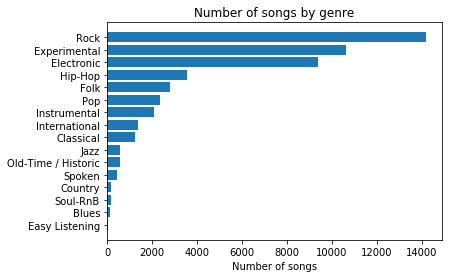

In [9]:
plt.barh(counts_by_genre.index, counts_by_genre)

plt.xlabel("Number of songs")
plt.title("Number of songs by genre")
plt.show()

### Multiple genres
TODO: Describe what we did, why we decided to keep the genres in a separate table, numerically encoded vs. text categories, etc.

In [10]:
tracks_data[("track", "genres_all")].sample(20)

track_id
62630               [2, 10, 77, 362]
18841                     [1235, 21]
122580           [811, 21, 1235, 15]
135227                [1032, 2, 102]
140654                  [12, 38, 15]
32505                           [21]
87341              [811, 21, 38, 15]
16774           [2, 9, 137, 177, 63]
27933               [25, 27, 12, 38]
13895                       [27, 12]
106567            [404, 314, 12, 85]
68455                      [514, 38]
20742                            [8]
126882                    [18, 1235]
59792     [1, 322, 4, 5, 38, 74, 15]
25391                 [240, 297, 15]
89641              [250, 36, 12, 38]
150839             [32, 15, 38, 183]
107312    [38, 15, 181, 22, 21, 542]
49401                      [125, 38]
Name: (track, genres_all), dtype: object

In [11]:
tracks_data[tracks_data.index.isin([140595, 135557, 135466])]

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
135466         -1                  NaN                  NaN      NaN   
135557         -1                  NaN                  NaN      NaN   
140595          0  2016-07-25 19:39:15  2016-07-25 00:00:00      NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
135466          -1     -1                                                NaN   
135557          -1  20338                                                NaN   
140595           0  21147  <p>FOO FEST is AS220’s annual summer block par...   

                                ...       track                         \
         listens producer tags  ... information interest language_code   
track_id                        ...                                      
135466        -1      NaN   []  ...         NaN      608           NaN   
135557        -1      NaN   []  ...         NaN      122           NaN   
140595     36296      NaN   []  ...         NaN     1792           NaN   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
135466    Creative Commons Attribution-NonCommercial-NoD...     517      NaN   
135557                               Attribution-ShareAlike      54      NaN   
140595    Creative Commons Attribution-NonCommercial-NoD...    1480      NaN   

                                                                
         number publisher tags                           title  
track_id                                                        
135466        2       NaN   []                You Know Why Now  
135557        5       NaN   []  No More Messages (Still There)  
140595       21       NaN   []             Wake Up Children...  

[3 rows x 52 columns]

It turns out that some of the songs don't have a genre at all. We found out this was not a problem.

In [12]:
missing_genres_filter = tracks_data[("track", "genres_all")].str.len() == len("[]")

In [13]:
tracks_data[missing_genres_filter]

album                                                         \
         comments         date_created        date_released     engineer   
track_id                                                                   
613             0  2008-11-26 02:11:10  2006-05-01 00:00:00          NaN   
1213            0  2008-11-26 02:42:02  2007-01-01 00:00:00          NaN   
1216            0  2008-11-26 02:42:37  2009-01-14 00:00:00          NaN   
1217            0  2008-11-26 02:42:02  2007-01-01 00:00:00          NaN   
3276            0  2008-12-08 07:41:44  2008-08-18 00:00:00  Gil Shuster   
...           ...                  ...                  ...          ...   
155192          0  2017-03-28 02:26:58                  NaN          NaN   
155193          0  2017-03-28 02:26:58                  NaN          NaN   
155194          0  2017-03-28 02:26:58                  NaN          NaN   
155195          0  2017-03-28 02:26:58                  NaN          NaN   
155288         -1                  NaN                  NaN          NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
613              0    174         <p>Collaboration with Argumentix<br /></p>   
1213             1    324  <p>45 minutes of beats only.<br /> No Organ No...   
1216             1    327  <p>A single 30-minute track from Mudboy's 2006...   
1217             1    324  <p>45 minutes of beats only.<br /> No Organ No...   
3276             4   1621  <p>The August 18th, 2008 episode of <a href="h...   
...            ...    ...                                                ...   
155192           0  22912  <p>M.NOMIZED: Synthesizers, Soundscapes, Progr...   
155193           0  22912  <p>M.NOMIZED: Synthesizers, Soundscapes, Progr...   
155194           0  22912  <p>M.NOMIZED: Synthesizers, Soundscapes, Progr...   
155195           0  22912  <p>M.NOMIZED: Synthesizers, Soundscapes, Progr...   
155288          -1     -1                                                NaN   

                                                       ...       track  \
         listens     producer                    tags  ... information   
track_id                                               ...               
613          113          NaN                      []  ...         NaN   
1213         236          NaN                      []  ...         NaN   
1216          34          NaN                      []  ...         NaN   
1217         236          NaN                      []  ...         NaN   
3276        5128  Jason Sigal                      []  ...         NaN   
...          ...          ...                     ...  ...         ...   
155192       453          NaN  ['ambient electronic']  ...         NaN   
155193       453          NaN  ['ambient electronic']  ...         NaN   
155194       453          NaN  ['ambient electronic']  ...         NaN   
155195       453          NaN  ['ambient electronic']  ...         NaN   
155288        -1          NaN                      []  ...         NaN   

                                 \
         interest language_code   
track_id                          
613           304            en   
1213          565            en   
1216           71            en   
1217          857            en   
3276          437            en   
...           ...           ...   
155192         76           NaN   
155193        128           NaN   
155194         53           NaN   
155195         83           NaN   
155288        277           NaN   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
613       Attribution-Noncommercial-Share Alike 3.0 Unit..

In [14]:
all_genres_cleaned = tracks_data[("track", "genres_all")].str.slice(1, -1)

In [15]:
all_genres_cleaned = all_genres_cleaned.str.split(", ", expand = True)

In [16]:
all_genres_cleaned = all_genres_cleaned.replace("", np.nan)

In [17]:
all_genres_cleaned = all_genres_cleaned.fillna(-1)

In [18]:
all_genres_cleaned = all_genres_cleaned.astype(int)

In [19]:
all_genres_cleaned.columns = [("track", "genre_" + str(column)) for column in all_genres_cleaned.columns]

In [20]:
all_genres_cleaned.to_csv("data/genres_for_songs.csv")

In [21]:
tracks_data = tracks_data.merge(all_genres_cleaned, on = "track_id")

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [22]:
tracks_data = tracks_data.drop(("track", "genres_all"), axis = 1)

In [23]:
tracks_data

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   
...           ...                  ...                  ...      ...   
155316          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155317          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155318          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155319          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155320          0  2017-03-26 16:22:18  2017-03-26 00:00:00      NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
2                4      1                                            <p></p>   
3                4      1                                            <p></p>   
5                4      1                                            <p></p>   
10               4      6                                                NaN   
20               2      4          <p> "spiritual songs" from Nicky Cook</p>   
...            ...    ...                                                ...   
155316           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155317           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155318           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155319           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155320           1  22906                                                NaN   

                               \
         listens     producer   
track_id                        
2           6073          NaN   
3           6073          NaN   
5           6073          NaN   
10         47632          NaN   
20          2710          NaN   
...          ...          ...   
155316      1506  Monty Hall    
155317      1506  Monty Hall    
155318      1506  Monty Hall    
155319      1506  Monty Hall    
155320      7481          NaN   

                                                             ...    track  \
                                                       tags  ... genre_21   
track_id                                                     ...            
2                                                        []  ...       -1   
3                                                        []  ...       -1   
5                                                        []  ...       -1   
10                                                       []  ...       -1   
20                                                       []  ...       -1   
...                                                     ...  ...      ...   
155316                                                   []  ...       -1   
155317                                                   []  ...       -1   
155318                                                   []  ...       -1   
155319                                                   []  ...       -1   
155320    ['ballad', 'epic', 'rockabilly', 'curse', 'hex...  ...       -1   

                                                                         \
         genre_22 genre_23 genre_24 genre_25 genre_26 genre_27 genre_28   
track_id                                                                  
2              -1       -1       -1       -1       -1       -1       -1   
3              -1       -1       -1     

We bring back the genre names.

In [24]:
genre_info = pd.read_csv("data/fma/genres.csv")

In [25]:
genre_info

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
...,...,...,...,...,...
158,1032,60,102,Turkish,2
159,1060,30,46,Tango,2
160,1156,26,130,Fado,2
161,1193,72,763,Christmas,38


In [26]:
genre_replacement_values = {}
for row_id, row in genre_info.iterrows():
    genre_replacement_values[row.genre_id] = row.title
genre_replacement_values[-1] = ""

In [27]:
genre_columns_filter = [("track", concrete) for (general, concrete) in tracks_data.columns if concrete.startswith("genre_") and concrete != "genre_top"]

In [28]:
tracks_data[genre_columns_filter] = tracks_data[genre_columns_filter].replace(genre_replacement_values)

In [29]:
tracks_data

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   
...           ...                  ...                  ...      ...   
155316          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155317          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155318          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155319          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155320          0  2017-03-26 16:22:18  2017-03-26 00:00:00      NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
2                4      1                                            <p></p>   
3                4      1                                            <p></p>   
5                4      1                                            <p></p>   
10               4      6                                                NaN   
20               2      4          <p> "spiritual songs" from Nicky Cook</p>   
...            ...    ...                                                ...   
155316           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155317           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155318           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155319           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155320           1  22906                                                NaN   

                               \
         listens     producer   
track_id                        
2           6073          NaN   
3           6073          NaN   
5           6073          NaN   
10         47632          NaN   
20          2710          NaN   
...          ...          ...   
155316      1506  Monty Hall    
155317      1506  Monty Hall    
155318      1506  Monty Hall    
155319      1506  Monty Hall    
155320      7481          NaN   

                                                             ...    track  \
                                                       tags  ... genre_21   
track_id                                                     ...            
2                                                        []  ...            
3                                                        []  ...            
5                                                        []  ...            
10                                                       []  ...            
20                                                       []  ...            
...                                                     ...  ...      ...   
155316                                                   []  ...            
155317                                                   []  ...            
155318                                                   []  ...            
155319                                                   []  ...            
155320    ['ballad', 'epic', 'rockabilly', 'curse', 'hex...  ...            

                                                                         \
         genre_22 genre_23 genre_24 genre_25 genre_26 genre_27 genre_28   
track_id                                                                  
2                                                                         
3                                       

### Album info cleanup
TODO: Describe that we don't need the album columns (at least initially).

In [30]:
album_columns = [(general, concrete) for (general, concrete) in tracks_data.columns if general == "album"]

In [31]:
tracks_data = tracks_data.drop(album_columns, axis = 1)

In [32]:
tracks_data

artist                       \
            active_year_begin      active_year_end   
track_id                                             
2         2006-01-01 00:00:00                  NaN   
3         2006-01-01 00:00:00                  NaN   
5         2006-01-01 00:00:00                  NaN   
10                        NaN                  NaN   
20        1990-01-01 00:00:00  2011-01-01 00:00:00   
...                       ...                  ...   
155316                    NaN                  NaN   
155317                    NaN                  NaN   
155318                    NaN                  NaN   
155319                    NaN                  NaN   
155320                    NaN                  NaN   

                                                             \
                                          associated_labels   
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   
...                                                     ...   
155316                                                  NaN   
155317                                                  NaN   
155318                                                  NaN   
155319                                                  NaN   
155320                                                  NaN   

                                                                      \
                                                        bio comments   
track_id                                                               
2         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
10        <p><span style="font-family:Verdana, Geneva, A...        3   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...        2   
...                                                     ...      ...   
155316                                                  NaN        0   
155317                                                  NaN        0   
155318                                                  NaN        0   
155319                                                  NaN        0   
155320    <p>****NOTE FOR USING OUR MUSIC ON YOUTUBE****...        1   

                                                           \
                 date_created favorites     id   latitude   
track_id                                                    
2         2008-11-26 01:42:32         9      1  40.058324   
3         2008-11-26 01:42:32         9      1  40.058324   
5         2008-11-26 01:42:32         9      1  40.058324   
10        2008-11-26 01:42:55        74      6        NaN   
20        2008-11-26 01:42:52        10      4  51.895927   
...                       ...       ...    ...        ...   
155316    2017-03-30 15:18:28         0  24357        NaN   
155317    2017-03-30 15:18:28         0  24357        NaN   
155318    2017-03-30 15:18:28         0  24357        NaN   
155319    2017-03-30 15:18:28         0  24357        NaN   
155320    2016-02-04 17:26:24        12  21615        NaN   

                                 ...    track                             \
                       location  ... genre_21 genre_22 genre_23 genre_24   
track_id                         ...                                       
2                    New Jersey  ...                                       
3                    New Jersey  ...                                       
5                    New Jersey  ...                                       
10                          NaN  ...                           

### Evolution of genres
TODO: Describe the goals and the process
#### Converting the relevant columns to their appropriate types

In [33]:
def convert_track_column_to_datetime(dataframe, track_column):
    dataframe[("track", track_column)] = pd.to_datetime(tracks_data[("track", track_column)])

In [34]:
convert_track_column_to_datetime(tracks_data, "date_created")
convert_track_column_to_datetime(tracks_data, "date_recorded")

In [35]:
num_tracks_by_year = tracks_data.groupby(tracks_data[("track", "date_recorded")].dt.year).size()

In [36]:
num_tracks_by_year

(track, date_recorded)
1896.0      1
1897.0      1
1899.0      3
1901.0      3
1902.0      1
         ... 
2013.0    119
2014.0     49
2015.0     93
2016.0    327
2017.0     33
Length: 67, dtype: int64

#### Time evolution: all songs

In [37]:
def plot_song_counts_by_year(
    num_tracks_by_year, 
    min_year = None, 
    max_year = None,
    plot_type = "bar",
    legend_title = None,
    show_figure = True):
    if min_year is None:
        min_year = num_tracks_by_year.index.min()
    if max_year is None:
        max_year = num_tracks_by_year.index.max()
        
    num_tracks_by_year_filtered = num_tracks_by_year[
        (num_tracks_by_year.index >= min_year) & (num_tracks_by_year.index <= max_year)]
    if plot_type == "bar":
        plt.bar(num_tracks_by_year_filtered.index, num_tracks_by_year_filtered, label = legend_title)
    elif plot_type == "line":
        plt.plot(num_tracks_by_year_filtered.index, num_tracks_by_year_filtered, label = legend_title)
    else:
        raise ValueError("The plot type must be either \"bar\" or \"line\"")
        
    plt.xlabel("Year")
    plt.ylabel("Number of songs")
    plt.xlim((min_year, max_year))
    if legend_title:
        plt.legend()
    if show_figure:
        plt.show()

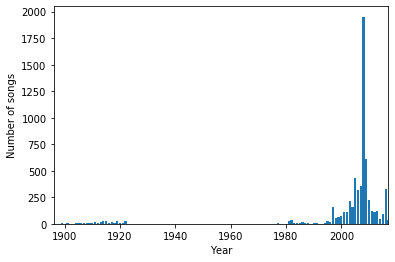

In [38]:
plot_song_counts_by_year(num_tracks_by_year)

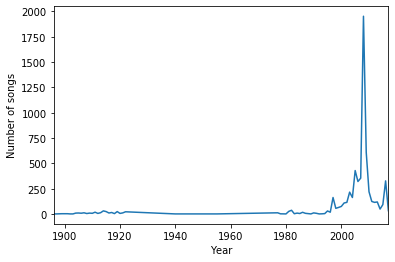

In [39]:
plot_song_counts_by_year(num_tracks_by_year, plot_type = "line")

TODO: Describe missing data (and how we found out that it was indeed missing, not skewed), comparison of plots and results.

In [40]:
num_tracks_by_year.idxmax(), num_tracks_by_year.max()

(2008.0, 1952)

In [41]:
num_tracks_by_year[(num_tracks_by_year.index >= 1925) & (num_tracks_by_year.index <= 1980)]

(track, date_recorded)
1940.0     1
1955.0     1
1977.0    12
1978.0     2
1980.0     1
dtype: int64

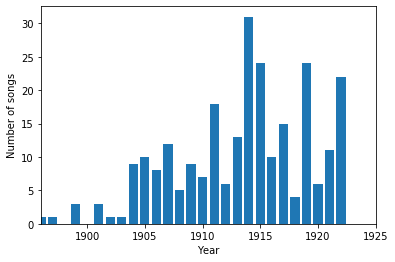

In [42]:
plot_song_counts_by_year(num_tracks_by_year, max_year = 1925)

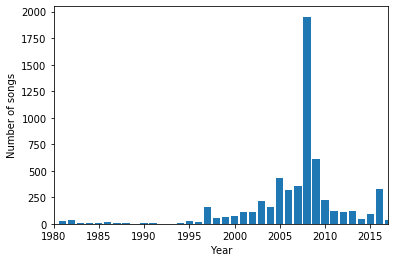

In [43]:
plot_song_counts_by_year(num_tracks_by_year, min_year = 1980)

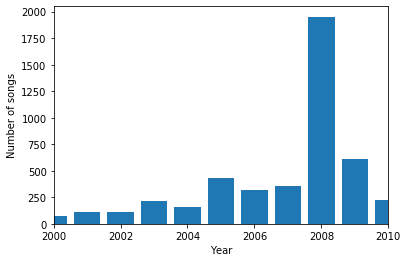

In [44]:
plot_song_counts_by_year(num_tracks_by_year, min_year = 2000, max_year = 2010)

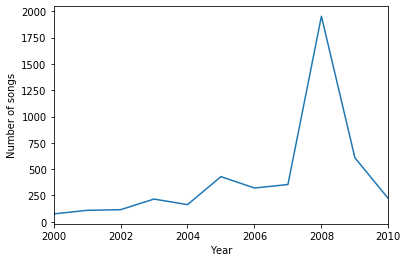

In [45]:
plot_song_counts_by_year(num_tracks_by_year, min_year = 2000, max_year = 2010, plot_type = "line")

#### Time evolution: per-genre split

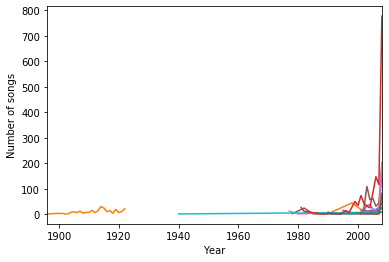

In [46]:
min_year, max_year = num_tracks_by_year.idxmin(), num_tracks_by_year.idxmax()

for genre_name, genre_data in tracks_data.groupby(("track", "genre_top")):
    num_tracks_in_genre_by_year = genre_data.groupby(genre_data[("track", "date_recorded")].dt.year).size()
    plot_song_counts_by_year(
        num_tracks_in_genre_by_year, 
        min_year = min_year, 
        max_year = max_year, 
        plot_type = "line", 
        show_figure = False)

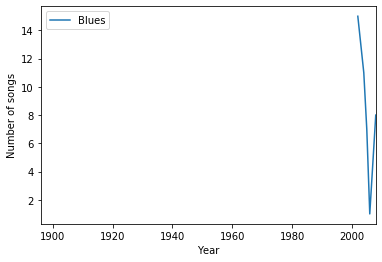

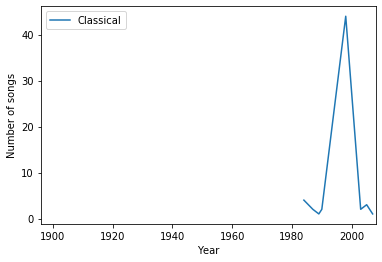

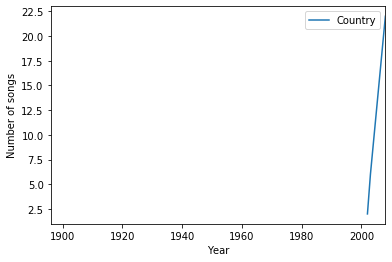

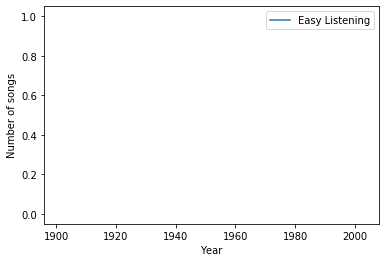

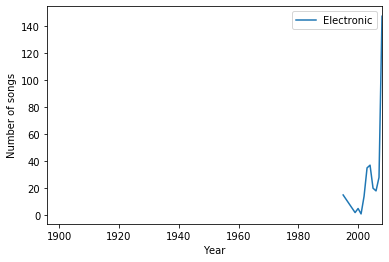

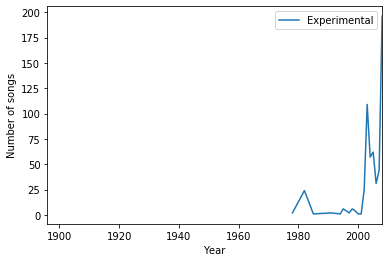

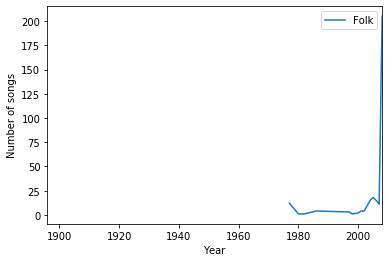

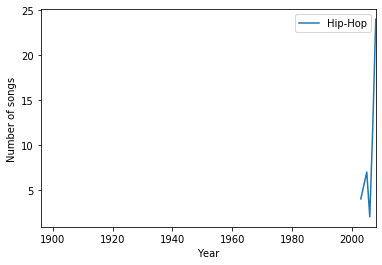

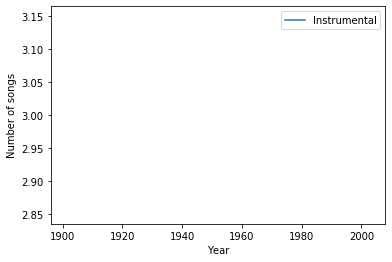

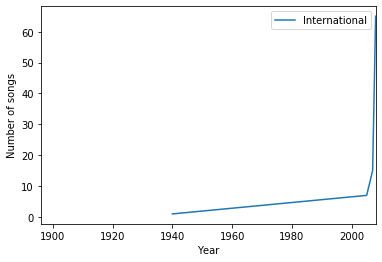

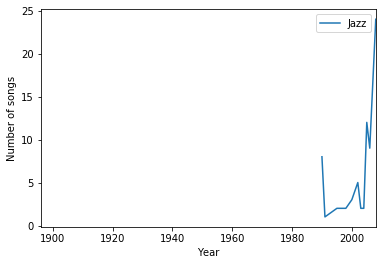

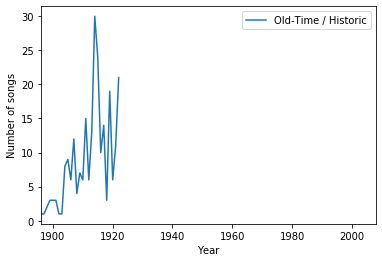

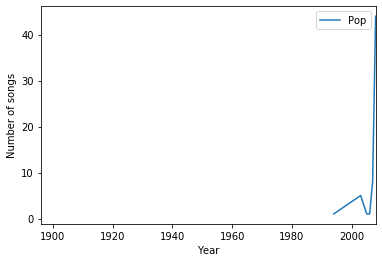

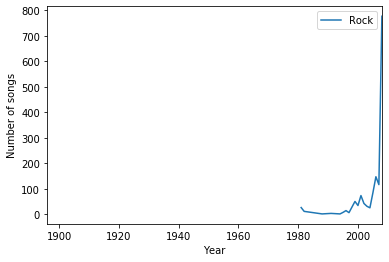

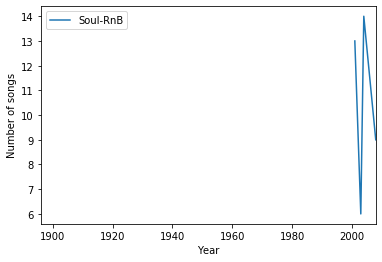

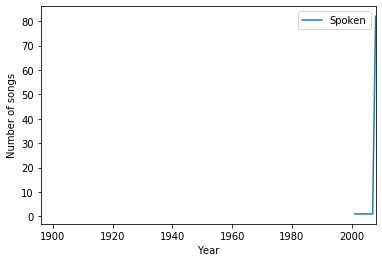

In [47]:
for genre_name, genre_data in tracks_data.groupby(("track", "genre_top")):
    num_tracks_in_genre_by_year = genre_data.groupby(genre_data[("track", "date_recorded")].dt.year).size()
    plot_song_counts_by_year(
        num_tracks_in_genre_by_year, 
        min_year = min_year, 
        max_year = max_year, 
        plot_type = "line",
        legend_title = genre_name,
        show_figure = True)

TODO: Describe results, possibly make prettier plots (e.g. subplots) for final presentation.

### Song durations: general behavior
TODO: Describe the process (from general to concrete analysis); describe asymmetry and how we found out about it, etc.

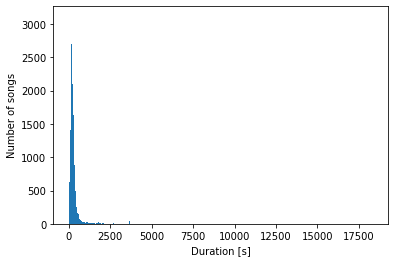

In [48]:
plt.hist(tracks_data[("track", "duration")], bins = "fd")

plt.xlabel("Duration [s]")
plt.ylabel("Number of songs")
plt.show()

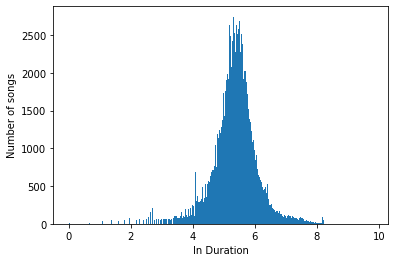

In [49]:
positive_song_durations = tracks_data[("track", "duration")] > 0
log_transformed_durations = np.log(tracks_data[positive_song_durations][("track", "duration")])

plt.hist(log_transformed_durations, bins = "fd")

plt.xlabel("ln Duration")
plt.ylabel("Number of songs")
plt.show()

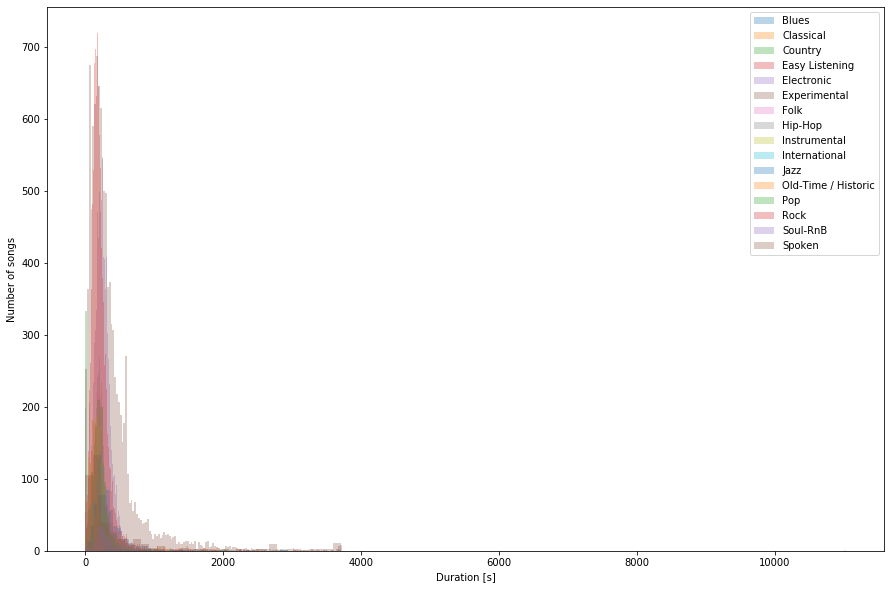

In [50]:
plt.figure(figsize = (15, 10))
for genre_name, genre_data in tracks_data.groupby(("track", "genre_top")):
    plt.hist(genre_data[("track", "duration")], label = genre_name, bins = "fd", alpha = 0.3)
    
    plt.xlabel("Duration [s]")
    plt.ylabel("Number of songs")
    plt.legend()
plt.show()

TODO: Make a graph where durations stand out more. A good idea is to plot the histogram without filling in the bars (use `step` as the histogram type).

### Durations vs. genre: statistical significance testing
TODO: Describe what we did, and why. Present the final results as a pivot table.

In [51]:
durations_by_genre = {}
for genre_name, genre_data in tracks_data.groupby(("track", "genre_top")):
    durations_by_genre[genre_name] = genre_data[("track", "duration")].tolist()

In [52]:
ttest_ind(durations_by_genre["Classical"], durations_by_genre["Hip-Hop"])

Ttest_indResult(statistic=14.503437982420598, pvalue=1.1152855700736453e-46)

In [53]:
for genre1 in durations_by_genre.keys():
    for genre2 in durations_by_genre.keys():
        print(genre1, genre2, ttest_ind(durations_by_genre[genre1], durations_by_genre[genre2]).pvalue)

Blues Blues 1.0
Blues Classical 0.16478099078229572
Blues Country 0.012086660643773377
Blues Easy Listening 0.31249703110001964
Blues Electronic 0.7916591496680272
Blues Experimental 0.005032869759071465
Blues Folk 0.13163814368611731
Blues Hip-Hop 1.375340465294909e-06
Blues Instrumental 0.6544020862348228
Blues International 0.14830290786435762
Blues Jazz 0.00011717538312733254
Blues Old-Time / Historic 6.412549424791028e-10
Blues Pop 2.7770184268800892e-06
Blues Rock 0.07217046844358146
Blues Soul-RnB 0.692998749501362
Blues Spoken 0.00011845044277681152
Classical Blues 0.16478099078229572
Classical Classical 1.0
Classical Country 0.0010241319232339521
Classical Easy Listening 0.7925137311141895
Classical Electronic 9.411783809073676e-10
Classical Experimental 9.947146283825229e-06
Classical Folk 5.5523732146671205e-18
Classical Hip-Hop 1.1152855700736453e-46
Classical Instrumental 2.595713846904216e-07
Classical International 0.44040238810651366
Classical Jazz 0.0001839076279235819

### Song lyrics
TODO: Describe how the dataset was generated, how we want to use it, and what we could do to model it (e.g. Naïve Bayes).

In [54]:
with open("data/musixmatch/mxm_dataset_train.txt", "r", encoding = "utf-8") as file:
    for i in range(17):
        file.readline()
    words = file.readline()

In [55]:
words = words[1:].split(",")

In [56]:
words

['i',
 'the',
 'you',
 'to',
 'and',
 'a',
 'me',
 'it',
 'not',
 'in',
 'my',
 'is',
 'of',
 'your',
 'that',
 'do',
 'on',
 'are',
 'we',
 'am',
 'will',
 'all',
 'for',
 'no',
 'be',
 'have',
 'love',
 'so',
 'know',
 'this',
 'but',
 'with',
 'what',
 'just',
 'when',
 'like',
 'now',
 'que',
 'time',
 'can',
 'come',
 'de',
 'there',
 'go',
 'up',
 'oh',
 'la',
 'one',
 'they',
 'out',
 'down',
 'get',
 'she',
 'was',
 'see',
 'if',
 'got',
 'never',
 'from',
 'he',
 'feel',
 'want',
 'let',
 'make',
 'way',
 'say',
 'take',
 'would',
 'as',
 'ca',
 'day',
 'at',
 'babi',
 'away',
 'life',
 'yeah',
 'y',
 'back',
 'by',
 'her',
 'heart',
 'here',
 'how',
 'could',
 'night',
 'need',
 'our',
 'look',
 'where',
 'en',
 'eye',
 'thing',
 'world',
 'more',
 'caus',
 'gonna',
 'die',
 'right',
 'been',
 'tell',
 'think',
 'un',
 'who',
 'el',
 'through',
 'man',
 'live',
 'again',
 'give',
 'too',
 'onli',
 'te',
 'tri',
 'tu',
 'or',
 'whi',
 'se',
 'keep',
 'dream',
 'well',
 'mind',

In [57]:
words_dictionary = {}
for i in list(range(1, 5001)):
    words_dictionary[i] = {}

In [58]:
N_SONGS = 1000

song_ids = []
with open("data/musixmatch/mxm_dataset_train.txt", "r", encoding = "utf-8") as file:
    for i in range(18):
        file.readline()
        
    current_song_info = file.readline().strip()
    song_counter = 1
    while current_song_info is not None:
        current_song_features = current_song_info.split(",")
        song_id = current_song_features[0]
        song_ids.append(song_id)
        word_counts = current_song_features[2:]
        word_counts = [word_count_pair.split(":") for word_count_pair in word_counts]
        for [word_id, count] in word_counts:
            word_id = int(word_id)
            count = int(count)
            words_dictionary[word_id][song_id] = count
        
        if song_counter > N_SONGS:
            break
        current_song_info = file.readline()
        song_counter += 1

In [59]:
for word_id in words_dictionary:
    for song_id in song_ids:
        if song_id not in words_dictionary[word_id]:
            words_dictionary[word_id][song_id] = 0

In [60]:
word_counts = pd.DataFrame(words_dictionary)
del words_dictionary

In [61]:
word_counts

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
TRAAAAV128F421A322,6,4,2,2,5,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAABD128F429CF47,10,0,17,8,2,2,1,3,2,3,...,0,0,0,0,0,0,0,0,0,0
TRAAAED128E0783FAB,28,15,2,12,22,2,2,4,2,1,...,0,0,0,0,0,0,0,0,0,0
TRAAAEF128F4273421,5,4,3,2,1,11,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEW128F42930C0,4,0,0,5,7,2,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRACYUG128F4259D4C,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TRACZVO128F9366E39,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRADABC128F4274FCC,0,0,0,0,0,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRADADG128F1471351,0,0,0,0,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### References
TODO: Link papers, other articles, methods, images, etc. that you have used. I'm leaving links to the datasets only.

[1] Million Song Dataset: http://millionsongdataset.com/

[2] MSD: MusiXMatch text features: http://millionsongdataset.com/musixmatch/

[3] Free Music Archive: https://freemusicarchive.org/